<a href="https://colab.research.google.com/github/ViniFogliarini/dnc_python/blob/main/Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Simples

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dataset = {"tempo":[1,3,4,4,6,8,10,10,11,13],
           "vendas":[91,110,106,116,119,129,139,143,138,159]}

dataset = pd.DataFrame(dataset)
dataset.head()

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


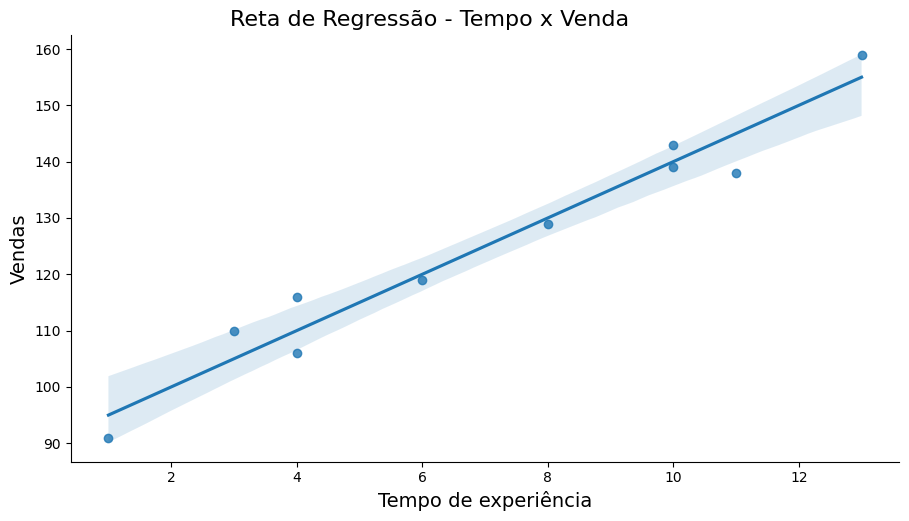

In [ ]:
ax = sns.lmplot(x="tempo", y="vendas", data=dataset) #para plotar reta linear
ax.fig.set_size_inches(10, 5)
ax.fig.suptitle('Reta de Regressão - Tempo x Venda', fontsize=16, y=1.02)
ax.set_xlabels("Tempo de experiência", fontsize=14)
ax.set_ylabels("Vendas", fontsize=14)
ax;

In [ ]:
dataset.corr()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [ ]:
import statsmodels.api as sm # biblioteca estatistica

In [ ]:
Y = dataset.vendas # o que queremos prever
X = sm.add_constant(dataset.tempo)

In [ ]:
Y.head()

0     91
1    110
2    106
3    116
4    119
Name: vendas, dtype: int64

In [ ]:
resultado_regressao = sm.OLS(Y, X).fit() # fit para treinar

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.22e-06
Time:                        23:50:22   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#Resíduo - erro

In [ ]:
dataset['Y_previsto'] = resultado_regressao.predict()
dataset

,tempo,vendas,Y_previsto
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0
5,8,129,130.0
6,10,139,140.0
7,10,143,140.0
8,11,138,145.0
9,13,159,155.0


In [ ]:
dataset["residuo"] = dataset["Y_previsto"] - dataset["vendas"]
dataset.head()

,tempo,vendas,Y_previsto,residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0


#Coeficiente de determinação

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.22e-06
Time:                        23:53:22   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EXERCICIO - aprovação alunos

In [ ]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# Criando nosso DataFrame

df = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/aprovacao_alunos.xlsx')
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


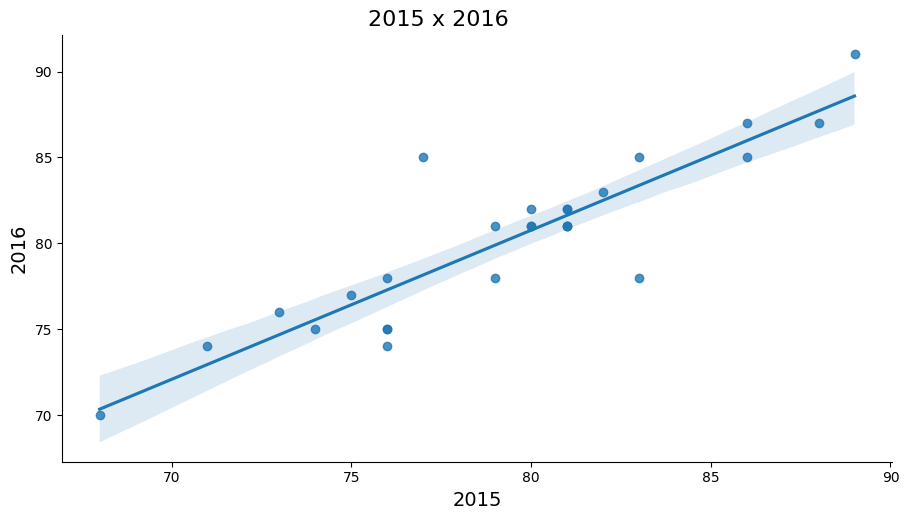

In [ ]:
# Plotando gráfico para ver a linearidade

ax = sns.lmplot(x="ano_2015", y="ano_2016", data=df) #para plotar reta linear
ax.fig.set_size_inches(10, 5)
ax.fig.suptitle('2015 x 2016', fontsize=16, y=1.02)
ax.set_xlabels("2015", fontsize=14)
ax.set_ylabels("2016", fontsize=14)
ax;

In [ ]:
# Verificando a correlação: positiva, alta. Maior de 70%
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [ ]:
# Definindo as várias - Y é a que queremos prever

Y = df.ano_2016
X = sm.add_constant(df.ano_2015)

In [ ]:
# Treinando o nosso modelo - .fit()

resultado_regressao = sm.OLS(Y,X).fit()

In [ ]:
print(resultado_regressao.summary())
# R-squared: R²  - maior de 0.5 está bom
# const coef - de onde começa
# coef linha de baixo - o fator para somar - B1 - nesse exemplo 0.8681

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           3.02e-10
Time:                        00:10:32   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [ ]:
# Criando a coluna Y_previsto para apresentar resultado

df['Y_previsto'] = resultado_regressao.predict()
df.head()

,UF,ano_2015,ano_2016,Y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [ ]:
# Criando a coluna Residuo para mostrar o resultado do residuo - erro
df['Residuo'] = df['Y_previsto'] - df['ano_2016']
df.head()

,UF,ano_2015,ano_2016,Y_previsto,Residuo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
